### Full Name : Mohammad Morsali
### Student Number : 400101956


# Support Vector Machines (SVM)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay,
)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Goal
In this assignment, we are going to implement Support Vector Machines (SVM) algorithm that determines which patient is in danger and which is not.

In [5]:
df = pd.read_csv("/kaggle/input/liver-disease/Liver_Disease.csv") 

### Pre-Processing

#### Exploratory Data Analysis:
In statistics, exploratory data analysis is an approach to analyze datasets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

This is a general approach that should be applied when you encounter a dataset.

Dataset shape (rows, columns): (583, 11)
Missing values per column:
 Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
label                         0
dtype: int64

Percentage of missing values per column:
 Age                           0.000000
Gender                        0.000000
Total_Bilirubin               0.000000
Direct_Bilirubin              0.000000
Alkaline_Phosphotase          0.000000
Alamine_Aminotransferase      0.000000
Aspartate_Aminotransferase    0.000000
Total_Protiens                0.000000
Albumin                       0.000000
Albumin_and_Globulin_Ratio    0.686106
label                         0.000000
dtype: float64
Target variable distribution:
 label
1    416
2    167
Name: count, dtype: int6

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


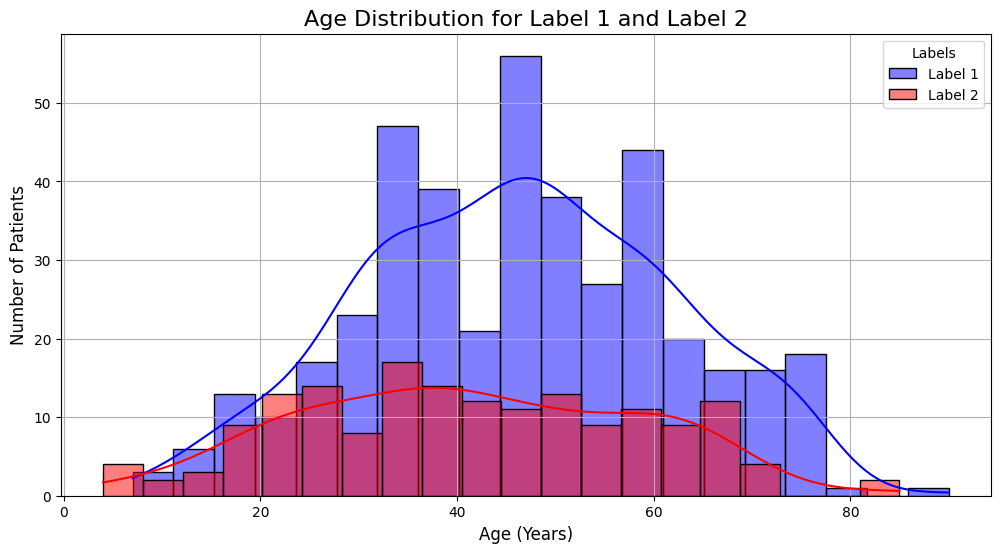

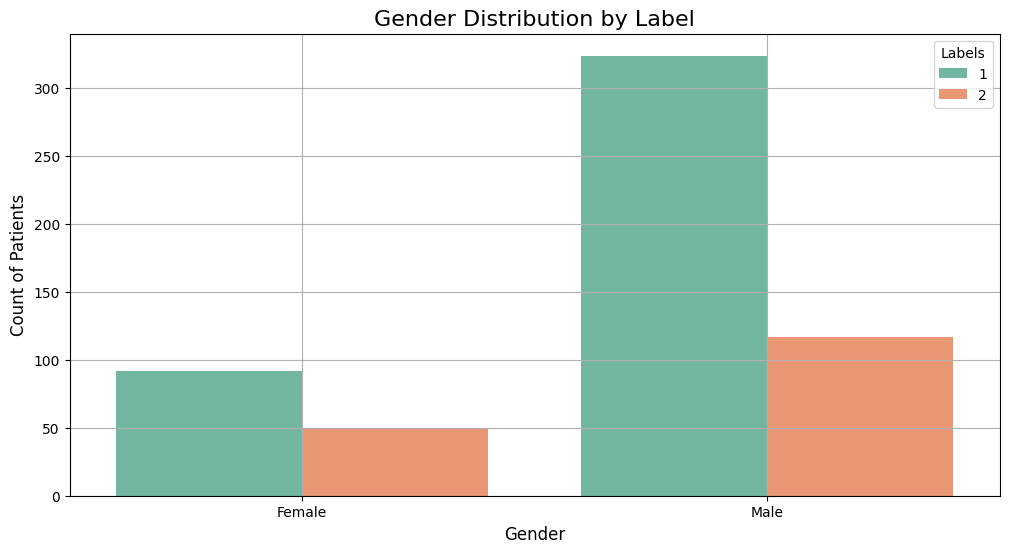

In [6]:
###############################################################################
## TODO: Find the shape of the dataset.
print("Dataset shape (rows, columns):", df.shape)  
###############################################################################


###############################################################################
## TODO: Check if there are missing entries in the dataset column-wise.
missing_values = df.isnull().sum()  # Store the result in a variable for reuse
print("Missing values per column:\n", missing_values)

# Adding percentage of missing values for better insight
missing_percentage = (missing_values / df.shape[0]) * 100
print("\nPercentage of missing values per column:\n", missing_percentage)
###############################################################################


###############################################################################
## TODO: Check whether the dataset is balanced or not.
label_distribution = df['label'].value_counts()
print("Target variable distribution:\n", label_distribution)

# Adding percentage distribution for better clarity
label_percentage = (label_distribution / df.shape[0]) * 100
print("\nPercentage distribution of target variable:\n", label_percentage)
###############################################################################


###############################################################################
###############################################################################
## TODO: Plot the age distribution and gender distribution for both groups 
## of patients. (4 plots)


# Ensure 'label' column is treated as string consistently for both age and gender plots
df['label'] = df['label'].astype(str)

# Define a function to plot age distribution for both labels
def plot_age_distribution():
    # Set the figure size
    plt.figure(figsize=(12, 6))
    
    # Filter and plot age distribution for label '1', ensuring the dataframe is not empty
    age_label_1 = df[df['label'] == '1']
    if not age_label_1.empty:
        sns.histplot(age_label_1['Age'], kde=True, color='blue', label='Label 1', bins=20)
    
    # Filter and plot age distribution for label '2', ensuring the dataframe is not empty
    age_label_2 = df[df['label'] == '2']
    if not age_label_2.empty:
        sns.histplot(age_label_2['Age'], kde=True, color='red', label='Label 2', bins=20)
    
    # Improve the plot aesthetics
    plt.legend(title="Labels")
    plt.title('Age Distribution for Label 1 and Label 2', fontsize=16)
    plt.xlabel('Age (Years)', fontsize=12)
    plt.ylabel('Number of Patients', fontsize=12)
    plt.grid(True)  # Adding grid for better readability
    plt.show()

# Function to plot gender distribution by label
def plot_gender_distribution():
    # Set the figure size
    plt.figure(figsize=(12, 6))
    
    # Plot gender distribution for both labels
    sns.countplot(x='Gender', hue='label', data=df, palette='Set2')

    # Improve the plot aesthetics
    plt.title('Gender Distribution by Label', fontsize=16)
    plt.xlabel('Gender', fontsize=12)
    plt.ylabel('Count of Patients', fontsize=12)
    plt.grid(True)  # Adding grid for better readability
    plt.legend(title="Labels")
    plt.show()

# Call the functions to plot the distributions
plot_age_distribution()
plot_gender_distribution()



##### Question: What do you conclude from the plots?

1. **Gender Distribution by Label**:
   - The first plot shows the gender distribution for each label (1 and 2). From the visualized data:
     - A significantly higher number of male patients is observed in both labels, with Label 1 having a notably larger number of male patients compared to female patients.
     - Female patients are more evenly distributed between Label 1 and Label 2 compared to male patients, where Label 1 has a much larger proportion.
     - This indicates that males may have a higher prevalence of liver disease (assuming Label 1 indicates the presence of liver disease).

2. **Age Distribution for Labels 1 and 2**:
   - The second plot shows the distribution of ages across patients for both labels.
     - For Label 1 (blue), there is a broad range of ages, but it appears that middle-aged patients (30-60 years) dominate the distribution.
     - For Label 2 (red), there is a generally lower number of patients, but a similar distribution trend, albeit with fewer people in older age groups (60+).
     - The plot suggests that liver disease (Label 1) affects a wide range of ages, particularly between 30 to 60 years, while the non-affected group (Label 2) has a more evenly distributed and lower overall count across ages.

### Conclusion:
- The dataset shows a gender imbalance, with more male patients, especially in Label 1. This could suggest that males are more likely to be affected by the condition being studied .
- The age distribution indicates that middle-aged individuals are more at risk of the condition associated with Label 1, while younger and older groups have relatively fewer patients in both labels.


#### Outlier Detection & Removal
Check whether we have outliers in the data. If there are, delete them.

In [7]:
# List of continuous columns (excluding 'Gender' and 'label')
continuous_features = [
    'Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
    'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens',
    'Albumin', 'Albumin_and_Globulin_Ratio'
]

print("\nDataset shape before outlier removal:", df.shape)

# Collect outlier indices from all continuous features
outlier_indices = set()

for feature in continuous_features:
    q1 = df[feature].quantile(0.25)  # First quartile (25th percentile)
    q3 = df[feature].quantile(0.75)  # Third quartile (75th percentile)
    iqr = q3 - q1  # Interquartile range

    # Define outlier boundaries
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr

    # Identify outliers
    outliers = df[(df[feature] < lower_fence) | (df[feature] > upper_fence)].index
    print(f"Number of outliers detected in '{feature}': {len(outliers)}")

    # Add outlier indices to the set
    outlier_indices.update(outliers)

# Remove all outliers at once
print(f"\nTotal outliers to remove: {len(outlier_indices)}")
df_cleaned = df.drop(outlier_indices)

# After removing outliers, print the new shape of the dataset
print("\nDataset shape after outlier removal:", df_cleaned.shape)

# Optional: Reset index after dropping rows
df_cleaned.reset_index(drop=True, inplace=True)



Dataset shape before outlier removal: (583, 11)
Number of outliers detected in 'Age': 0
Number of outliers detected in 'Total_Bilirubin': 84
Number of outliers detected in 'Direct_Bilirubin': 81
Number of outliers detected in 'Alkaline_Phosphotase': 69
Number of outliers detected in 'Alamine_Aminotransferase': 73
Number of outliers detected in 'Aspartate_Aminotransferase': 66
Number of outliers detected in 'Total_Protiens': 8
Number of outliers detected in 'Albumin': 0
Number of outliers detected in 'Albumin_and_Globulin_Ratio': 10

Total outliers to remove: 185

Dataset shape after outlier removal: (398, 11)


#### Feature Engineering:
Sometimes the collected data are raw; they are either incompatible with your model or hinders its performance. That’s when feature engineering comes to rescue. It encompasses preprocessing techniques to compile a dataset by extracting features from raw data.
also feel free to do more feature engineering techniques if needed.

In [8]:
################################################################################
## TODO: Normalize numerical features to be between 0 and 1                   ##
## Note that only numerical features should be normalized.                    ##


# Create a pipeline for preprocessing continuous features
continuous_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

# Apply the preprocessing pipeline to df_cleaned
df_cleaned[continuous_features] = continuous_pipeline.fit_transform(df_cleaned[continuous_features])

# Apply the same preprocessing to df
df[continuous_features] = continuous_pipeline.transform(df[continuous_features])

# Verify that there are no more missing values in df_cleaned
missing_values = df_cleaned.isnull().sum()
print("Missing values after preprocessing:\n", missing_values)

# Display the first few rows to confirm normalization
print("First few rows of normalized continuous features:\n", df_cleaned[continuous_features].head())

# Additional code to check for infinite values and replace them if any
# Replace infinite values with NaN and then impute
df_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)
df_cleaned[continuous_features] = continuous_pipeline.fit_transform(df_cleaned[continuous_features])

# Verify again that there are no missing or infinite values
print("Final check for missing values:\n", df_cleaned.isnull().sum())
################################################################################


Missing values after preprocessing:
 Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
label                         0
dtype: int64
First few rows of normalized continuous features:
         Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0  0.709302         0.061224          0.000000              0.297362   
1  0.627907         0.122449          0.107143              0.285372   
2  0.790698         0.714286          0.678571              0.316547   
3  0.488372         0.285714          0.214286              0.347722   
4  0.255814         0.102041          0.035714              0.218225   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                  0.068966            

### SVM

#### spliting data

Training features shape: (349, 10)
Validation features shape: (117, 10)
Testing features shape: (117, 10)

Training set label distribution:
label
1    0.713467
2    0.286533
Name: proportion, dtype: float64

Validation set label distribution:
label
1    0.717949
2    0.282051
Name: proportion, dtype: float64

Testing set label distribution:
label
1    0.709402
2    0.290598
Name: proportion, dtype: float64


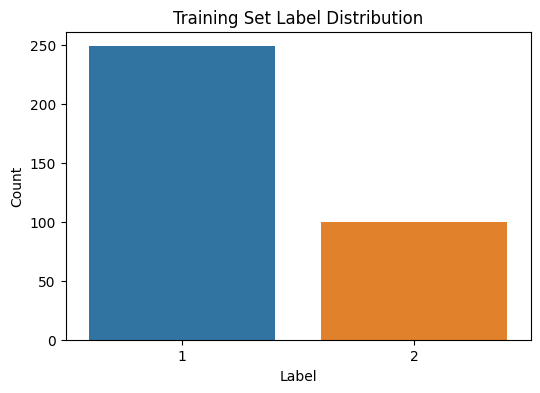

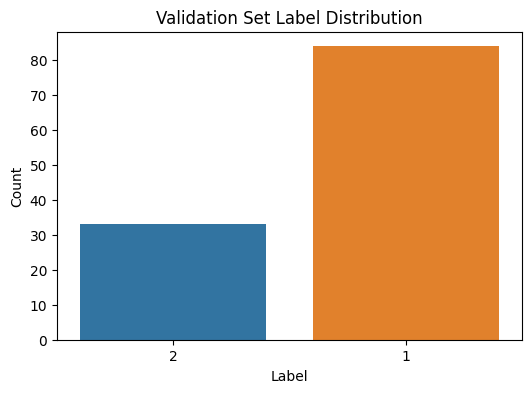

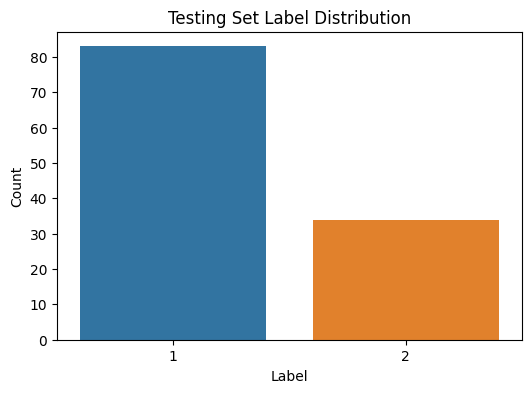

In [9]:
## TODO Split the data into test and training sets.
################################################################################
## TODO: Split the dataset into training, validation, and testing sets.        ##


# Separate the features and the target variable
features = df.drop('label', axis=1)  # All columns except 'label'
target_variable = df['label']        # The 'label' column

# First, split the data into temporary and testing sets
X_temp, X_test, y_temp, y_test = train_test_split(
    features,
    target_variable,
    test_size=0.2,
    random_state=42,
    stratify=target_variable
)

# Then, split the temporary set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=0.25,  # 0.25 x 0.8 = 0.2 of the original data
    random_state=42,
    stratify=y_temp
)

# Output the shapes of the resulting datasets
print(f"Training features shape: {X_train.shape}")
print(f"Validation features shape: {X_val.shape}")
print(f"Testing features shape: {X_test.shape}")

# Display the distribution of the target variable in each set
print("\nTraining set label distribution:")
print(y_train.value_counts(normalize=True))
print("\nValidation set label distribution:")
print(y_val.value_counts(normalize=True))
print("\nTesting set label distribution:")
print(y_test.value_counts(normalize=True))

# Additional code to visualize label distribution across the datasets
def plot_label_distribution(y, dataset_name):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=y)
    plt.title(f'{dataset_name} Label Distribution')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.show()

# Plot the distribution of labels in the training set
plot_label_distribution(y_train, 'Training Set')

# Plot the distribution of labels in the validation set
plot_label_distribution(y_val, 'Validation Set')

# Plot the distribution of labels in the testing set
plot_label_distribution(y_test, 'Testing Set')

# Check for class imbalance and print a warning if imbalance is significant
def check_class_imbalance(y, dataset_name):
    class_counts = y.value_counts(normalize=True)
    imbalance_threshold = 0.1  # Define what you consider as imbalance
    if class_counts.min() < imbalance_threshold:
        print(f"Warning: Significant class imbalance detected in {dataset_name}.")

check_class_imbalance(y_train, 'Training Set')
check_class_imbalance(y_val, 'Validation Set')
check_class_imbalance(y_test, 'Testing Set')
################################################################################



### SVM using Scikit-Learn:
First of all train an svm model with default parameters and report its.

In [10]:
#########################################################################################
## TODO: Train an SVM model with improved preprocessing and evaluate its performance.


# Identify numerical and categorical features
numerical_features = continuous_features  # As defined previously
categorical_features = ['Gender']         # The 'Gender' column

# Define the preprocessing steps for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Define the preprocessing steps for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine numerical and categorical transformers
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Create the complete pipeline with preprocessing and classifier
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])

# Define the feature matrix and target vector
feature_matrix = df.drop('label', axis=1)  # Features: all columns except 'label'
target_vector = df['label']                # Target variable: 'label' column

# Split the dataset into training and testing sets (80% training, 20% testing)
features_train, features_test, target_train, target_test = train_test_split(
    feature_matrix,
    target_vector,
    test_size=0.2,
    random_state=42,
    stratify=target_vector
)

# Train the SVM model using the pipeline
svm_pipeline.fit(features_train, target_train)

# Make predictions on the test set
predictions = svm_pipeline.predict(features_test)

# Evaluate the model
accuracy = accuracy_score(target_test, predictions)
print(f"SVM Accuracy with mean-imputed data: {accuracy * 100:.2f}%\n")

# Print classification report
print("Classification Report:")
print(classification_report(target_test, predictions))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(target_test, predictions))

# Perform cross-validation
cv_scores = cross_val_score(svm_pipeline, feature_matrix, target_vector, cv=5)
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")
#########################################################################################


SVM Accuracy with mean-imputed data: 68.38%

Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.96      0.81        83
           2       0.00      0.00      0.00        34

    accuracy                           0.68       117
   macro avg       0.35      0.48      0.41       117
weighted avg       0.50      0.68      0.58       117

Confusion Matrix:
[[80  3]
 [34  0]]
Cross-Validation Accuracy Scores: [0.7008547  0.70940171 0.70940171 0.71551724 0.71551724]
Mean Cross-Validation Accuracy: 71.01%


#### Grid Search
Use Grid search and validation set to find the best parameters for your SVM model.

In [11]:
#########################################################################################
## TODO: Use Grid Search and validation set to find the best parameters for your SVM model.

# Split the dataset into training, validation, and testing sets
# First, split the data into temporary and testing sets
features_temp, features_test, target_temp, target_test = train_test_split(
    feature_matrix,
    target_vector,
    test_size=0.2,
    random_state=42,
    stratify=target_vector
)

# Then, split the temporary set into training and validation sets
features_train, features_val, target_train, target_val = train_test_split(
    features_temp,
    target_temp,
    test_size=0.25,  # 0.25 x 0.8 = 0.2 of the original data
    random_state=42,
    stratify=target_temp
)

print(f"Training features shape: {features_train.shape}")
print(f"Validation features shape: {features_val.shape}")
print(f"Testing features shape: {features_test.shape}")

# Define the parameter grid to search
param_grid = [
    {
        'classifier__kernel': ['linear'],
        'classifier__C': [0.1, 1, 10, 100]
    },
    {
        'classifier__kernel': ['rbf'],
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__gamma': ['scale', 'auto']
    },
    {
        'classifier__kernel': ['poly'],
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__degree': [2, 3, 4],
        'classifier__gamma': ['scale', 'auto'],
        'classifier__coef0': [0.0, 0.1, 0.5]
    }
]

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=2
)

# Fit GridSearchCV using the training data
grid_search.fit(features_train, target_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the best model on the validation set
best_model = grid_search.best_estimator_

# Make predictions on the validation set
predictions_val = best_model.predict(features_val)




Training features shape: (349, 10)
Validation features shape: (117, 10)
Testing features shape: (117, 10)
Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV] END .......classifier__C=0.1, classifier__kernel=linear; total time=   0.0s
[CV] END .........classifier__C=1, classifier__kernel=linear; total time=   0.0s
[CV] END ........classifier__C=10, classifier__kernel=linear; total time=   0.0s
[CV] END ........classifier__C=10, classifier__kernel=linear; total time=   0.0s
[CV] END .......classifier__C=100, classifier__kernel=linear; total time=   0.1s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=auto, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=1, classifier__gamma=scale, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=1, classifier__gamma=scale, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=1, classifier__gamma=auto

Train an svm model on the entire training data using the parameters you found in the previous step.

In [12]:
# Evaluate the model
accuracy_val = accuracy_score(target_val, predictions_val)
print(f"\nValidation Accuracy with best parameters: {accuracy_val * 100:.2f}%\n")

# Print classification report
print("Classification Report on Validation Set:")
print(classification_report(target_val, predictions_val))

# Print confusion matrix
print("Confusion Matrix on Validation Set:")
print(confusion_matrix(target_val, predictions_val))

# Now evaluate on the test set
predictions_test = best_model.predict(features_test)
accuracy_test = accuracy_score(target_test, predictions_test)
print(f"\nTest Accuracy with best parameters: {accuracy_test * 100:.2f}%\n")

print("Classification Report on Test Set:")
print(classification_report(target_test, predictions_test))

print("Confusion Matrix on Test Set:")
print(confusion_matrix(target_test, predictions_test))
#########################################################################################


Validation Accuracy with best parameters: 70.94%

Classification Report on Validation Set:
              precision    recall  f1-score   support

           1       0.72      0.99      0.83        84
           2       0.00      0.00      0.00        33

    accuracy                           0.71       117
   macro avg       0.36      0.49      0.41       117
weighted avg       0.51      0.71      0.60       117

Confusion Matrix on Validation Set:
[[83  1]
 [33  0]]

Test Accuracy with best parameters: 67.52%

Classification Report on Test Set:
              precision    recall  f1-score   support

           1       0.70      0.95      0.81        83
           2       0.00      0.00      0.00        34

    accuracy                           0.68       117
   macro avg       0.35      0.48      0.40       117
weighted avg       0.50      0.68      0.57       117

Confusion Matrix on Test Set:
[[79  4]
 [34  0]]


### Confusion Matrix
Plot the confusion matrix and report the model accuracy on test set.
What does each entry of the confusion matrix mean?

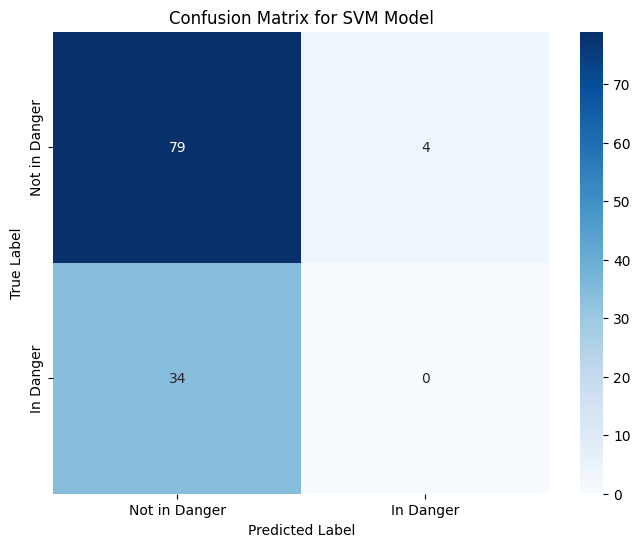

<Figure size 640x480 with 0 Axes>

In [13]:
#########################################################################################
## TODO: Evaluate the final model and visualize the confusion matrix.
#########################################################################################



# Calculate the confusion matrix
confusion_mat = confusion_matrix(target_test, predictions_test)

# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    confusion_mat,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Not in Danger', 'In Danger'],
    yticklabels=['Not in Danger', 'In Danger'],
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Model')
plt.show()

# # Report the model accuracy on the test set
# test_accuracy = accuracy_score(target_test, predictions_test)
# print(f"Model Accuracy on Test Set: {test_accuracy * 100:.2f}%\n")

# # Print classification report
# print("Classification Report on Test Set:")
# print(
#     classification_report(
#         target_test,
#         predictions_test,
#         target_names=['Not in Danger', 'In Danger'],
#         zero_division=0,
#     )
# )

# # Calculate ROC AUC score if applicable
# if len(set(target_test)) == 2:  # Binary classification check
#     roc_auc = roc_auc_score(target_test, best_model.decision_function(features_test))
#     print(f"ROC AUC Score on Test Set: {roc_auc:.2f}\n")

#     # Plot ROC Curve
#     RocCurveDisplay.from_estimator(best_model, features_test, target_test)
#     plt.title('ROC Curve for SVM Model')
#     plt.show()

# Additional code to save the confusion matrix plot
plt.savefig('confusion_matrix.png', bbox_inches='tight')
#########################################################################################


The **confusion matrix** is a table that allows you to visualize the performance of a classification model by comparing the actual labels with the predicted labels. Each entry in the confusion matrix represents the number of instances corresponding to a particular combination of predicted and actual classes.

In the context of  binary classification problem with classes **'Not in Danger'** and **'In Danger'**, the confusion matrix is a 2x2 table that looks like this:

```
                   Predicted
                  | Not in Danger | In Danger |
-----------------------------------------------
Actual | Not in Danger |      TN       |    FP     |
       | In Danger     |      FN       |    TP     |
```

Here's what each entry means:

1. **True Negatives (TN)**:
   - **Definition**: The number of instances where the model correctly predicted **'Not in Danger'** when the actual label was **'Not in Danger'**.
   - **Interpretation**: These are correct predictions where the model accurately identified safe instances.

2. **False Positives (FP)**:
   - **Definition**: The number of instances where the model incorrectly predicted **'In Danger'** when the actual label was **'Not in Danger'**.
   - **Interpretation**: These are instances where the model raised a false alarm, indicating danger where there was none. Also known as **Type I errors**.

3. **False Negatives (FN)**:
   - **Definition**: The number of instances where the model incorrectly predicted **'Not in Danger'** when the actual label was **'In Danger'**.
   - **Interpretation**: These are missed detections where the model failed to identify actual danger. Also known as **Type II errors**.

4. **True Positives (TP)**:
   - **Definition**: The number of instances where the model correctly predicted **'In Danger'** when the actual label was **'In Danger'**.
   - **Interpretation**: These are correct predictions where the model accurately identified dangerous instances.

Add some outliers to the dataset, train an SVM and logistic regression model, and compare the results.

SVM Accuracy with outliers: 68.38%

SVM Classification Report:
               precision    recall  f1-score   support

Not in Danger       0.70      0.96      0.81        83
    In Danger       0.00      0.00      0.00        34

     accuracy                           0.68       117
    macro avg       0.35      0.48      0.41       117
 weighted avg       0.50      0.68      0.58       117

Logistic Regression Accuracy with outliers: 69.23%

Logistic Regression Classification Report:
               precision    recall  f1-score   support

Not in Danger       0.73      0.90      0.81        83
    In Danger       0.43      0.18      0.25        34

     accuracy                           0.69       117
    macro avg       0.58      0.54      0.53       117
 weighted avg       0.64      0.69      0.64       117



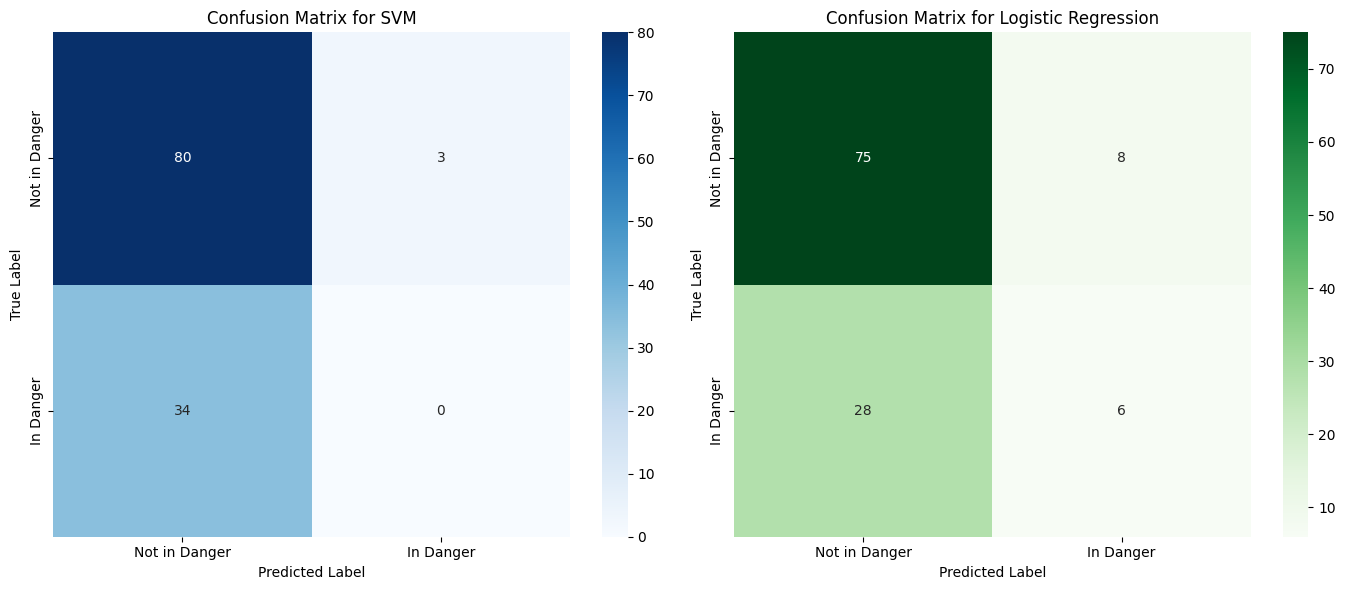

SVM ROC AUC Score with outliers: 0.60
Logistic Regression ROC AUC Score with outliers: 0.74


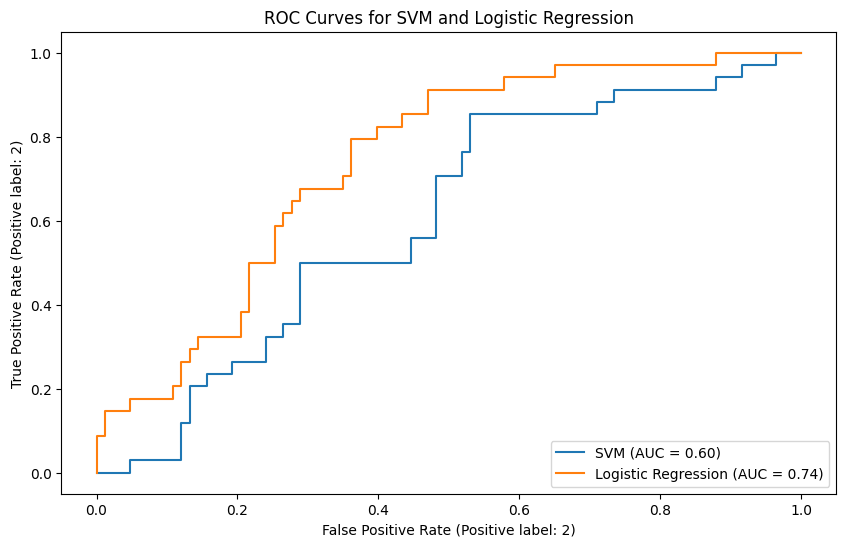

In [14]:
#########################################################################################
## TODO: Add outliers to the dataset, train an SVM and Logistic Regression model, and compare the results.
#########################################################################################




# Identify numerical and categorical features
numerical_features = continuous_features  # As defined previously
categorical_features = ['Gender']         # The 'Gender' column

# Define the preprocessing steps for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Define the preprocessing steps for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine numerical and categorical transformers
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Create pipelines for SVM and Logistic Regression models
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])

logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Define the feature matrix and target vector using the dataset with outliers
feature_matrix = df.drop('label', axis=1)  # Features: all columns except 'label'
target_vector = df['label']                # Target variable: 'label' column

# Split the dataset into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(
    feature_matrix,
    target_vector,
    test_size=0.2,
    random_state=42,
    stratify=target_vector
)

# Train the SVM model using the pipeline
svm_pipeline.fit(features_train, target_train)

# Make predictions on the test set using SVM
svm_predictions = svm_pipeline.predict(features_test)

# Evaluate the SVM model
svm_accuracy = accuracy_score(target_test, svm_predictions)
print(f"SVM Accuracy with outliers: {svm_accuracy * 100:.2f}%\n")

print("SVM Classification Report:")
print(classification_report(target_test, svm_predictions, target_names=['Not in Danger', 'In Danger'], zero_division=0))

# Confusion matrix for SVM
svm_confusion_mat = confusion_matrix(target_test, svm_predictions)

# Train the Logistic Regression model using the pipeline
logreg_pipeline.fit(features_train, target_train)

# Make predictions on the test set using Logistic Regression
logreg_predictions = logreg_pipeline.predict(features_test)

# Evaluate the Logistic Regression model
logreg_accuracy = accuracy_score(target_test, logreg_predictions)
print(f"Logistic Regression Accuracy with outliers: {logreg_accuracy * 100:.2f}%\n")

print("Logistic Regression Classification Report:")
print(classification_report(target_test, logreg_predictions, target_names=['Not in Danger', 'In Danger'], zero_division=0))

# Confusion matrix for Logistic Regression
logreg_confusion_mat = confusion_matrix(target_test, logreg_predictions)

# Function to plot confusion matrices side by side
def plot_confusion_matrices(cm1, cm2, labels, model_names):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels, ax=axes[0])
    axes[0].set_title(f'Confusion Matrix for {model_names[0]}')
    axes[0].set_xlabel('Predicted Label')
    axes[0].set_ylabel('True Label')
    
    sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens',
                xticklabels=labels, yticklabels=labels, ax=axes[1])
    axes[1].set_title(f'Confusion Matrix for {model_names[1]}')
    axes[1].set_xlabel('Predicted Label')
    axes[1].set_ylabel('True Label')
    
    plt.tight_layout()
    plt.show()

# Plot confusion matrices for both models
plot_confusion_matrices(
    svm_confusion_mat,
    logreg_confusion_mat,
    labels=['Not in Danger', 'In Danger'],
    model_names=['SVM', 'Logistic Regression']
)

# Compare ROC AUC scores if applicable
if len(set(target_test)) == 2:
    # For SVM
    svm_roc_auc = roc_auc_score(target_test, svm_pipeline.decision_function(features_test))
    print(f"SVM ROC AUC Score with outliers: {svm_roc_auc:.2f}")
    
    # For Logistic Regression
    logreg_roc_auc = roc_auc_score(target_test, logreg_pipeline.decision_function(features_test))
    print(f"Logistic Regression ROC AUC Score with outliers: {logreg_roc_auc:.2f}")
    
    # Plot ROC Curves
    plt.figure(figsize=(10, 6))
    RocCurveDisplay.from_estimator(svm_pipeline, features_test, target_test, name='SVM', ax=plt.gca())
    RocCurveDisplay.from_estimator(logreg_pipeline, features_test, target_test, name='Logistic Regression', ax=plt.gca())
    plt.title('ROC Curves for SVM and Logistic Regression')
    plt.show()

#########################################################################################


As you can see the results logistic regression perform better in compare to SVM